In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
display(df["yr_built"].min(),df["yr_built"].max())
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import metrics

NameError: name 'df' is not defined

In [ ]:
df = pd.read_csv("/Users/shuoli/Desktop/cs 677 new/Final_Project/data set/kc_house_data.csv",sep=",")
df.head()

In [ ]:
df.shape

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df[df["yr_renovated"]==0].yr_renovated.count()

20699

In [6]:
df.drop(columns=["id","date","sqft_lot","waterfront","view","yr_renovated","zipcode","sqft_living15","lat","long" ,"sqft_lot15"],inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,1.0,3,7,1180,0,1955
1,538000.0,3,2.25,2570,2.0,3,7,2170,400,1951
2,180000.0,2,1.00,770,1.0,3,6,770,0,1933
3,604000.0,4,3.00,1960,1.0,5,7,1050,910,1965
4,510000.0,3,2.00,1680,1.0,3,8,1680,0,1987


In [7]:
df.shape

(21613, 10)

In [8]:
df.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
floors           False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
dtype: bool

In [9]:
df["price"].describe()

count    2.161300e+04
mean     5.401822e+05
std      3.673622e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

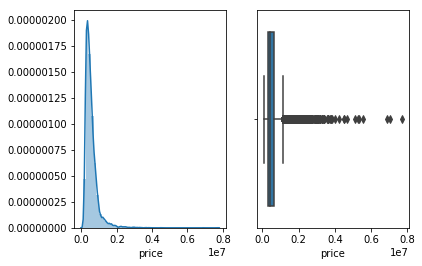

In [10]:
plt.figure()
plt.subplot(1,2,1)
sns.distplot(df["price"])
plt.subplot(1,2,2)
sns.boxplot(df["price"])

In [11]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1
df = df[((df["price"] > (q1 - 1.5 * iqr)) &(df["price"] < (q3 + 1.5 * iqr)))]
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,1.0,3,7,1180,0,1955
1,538000.0,3,2.25,2570,2.0,3,7,2170,400,1951
2,180000.0,2,1.00,770,1.0,3,6,770,0,1933
3,604000.0,4,3.00,1960,1.0,5,7,1050,910,1965
4,510000.0,3,2.00,1680,1.0,3,8,1680,0,1987


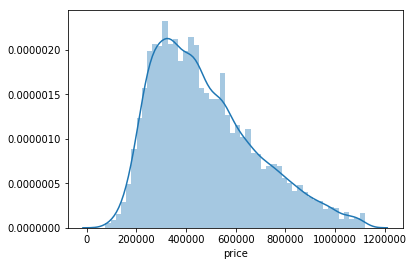

In [12]:
sns.distplot(df["price"])

In [13]:
df.shape

(20454, 10)

In [14]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  , 3.5 ,
       0.75, 4.25, 0.  , 1.25, 4.5 , 3.75, 4.75, 5.  , 0.5 , 6.75, 5.25,
       7.5 , 5.5 , 5.75, 6.  ])

In [15]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  0,  7,  8,  9, 11, 10, 33])

In [16]:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [17]:
df.condition.unique()

array([3, 5, 4, 1, 2])

In [18]:
df.grade.unique()

array([ 7,  6,  8,  9,  5, 10, 11,  4, 12,  3,  1])

In [19]:
display(df[df["bathrooms"]== 0],df[df["bathrooms"]==0.5])

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built
875,1100000.0,0,0.0,3064,3.5,3,7,3064,0,1990
1149,75000.0,1,0.0,670,1.0,3,3,670,0,1966
3119,380000.0,0,0.0,1470,3.0,3,8,1470,0,2006
5832,280000.0,1,0.0,600,1.0,2,3,600,0,1950
9773,355000.0,0,0.0,2460,2.0,3,8,2460,0,1990
9854,235000.0,0,0.0,1470,2.0,3,7,1470,0,1996
10481,484000.0,1,0.0,690,1.0,4,7,690,0,1948
14423,139950.0,0,0.0,844,1.0,4,7,844,0,1913
19452,142000.0,0,0.0,290,1.0,1,1,290,0,1963


,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built
2261,273000.0,2,0.5,1180,1.0,4,6,590,590,1945
10424,109000.0,2,0.5,580,1.0,3,5,580,0,1941
11674,255000.0,1,0.5,880,1.0,3,6,500,380,1910
12041,312500.0,4,0.5,2300,2.0,3,8,2300,0,1996


In [20]:
df=df[df["bathrooms"]>0.5]
df.shape

(20441, 10)

In [21]:
df[df["bedrooms"]==0]

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built
3467,288000.0,0,1.50,1430,3.0,3,7,1430,0,1999
4868,228000.0,0,1.00,390,1.0,2,4,390,0,1953
8477,339950.0,0,2.50,2290,2.0,3,8,2290,0,1985
8484,240000.0,0,2.50,1810,2.0,3,7,1810,0,2003
12653,320000.0,0,2.50,1490,2.0,3,7,1490,0,1999
18379,265000.0,0,0.75,384,1.0,3,4,384,0,2003


In [22]:
df[df["bedrooms"]==33]

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built
15870,640000.0,33,1.75,1620,1.0,5,7,1040,580,1947


In [23]:
df=df[df["bedrooms"]>0]

In [24]:
df=df[df["bedrooms"]<33]
df.shape

(20434, 10)

In [25]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
floors           float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
dtype: object

In [26]:
data = copy.deepcopy(df)
df1 = copy.deepcopy(df)

In [27]:
display(df["yr_built"].min(),df["yr_built"].max())

1900

2015

In [28]:
bins=[1899,1923,1946,1969,1992,2015]
df["yr_built"]=pd.cut(df["yr_built"],bins)

In [29]:
df["yr_built"].value_counts()

(1992, 2015]    5776
(1946, 1969]    5589
(1969, 1992]    5077
(1923, 1946]    2307
(1899, 1923]    1685
Name: yr_built, dtype: int64

In [30]:
df["perprice"]=df["price"]/df["sqft_living"]
df

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,perprice
0,221900.0,3,1.00,1180,1.0,3,7,1180,0,"(1946, 1969]",188.050847
1,538000.0,3,2.25,2570,2.0,3,7,2170,400,"(1946, 1969]",209.338521
2,180000.0,2,1.00,770,1.0,3,6,770,0,"(1923, 1946]",233.766234
3,604000.0,4,3.00,1960,1.0,5,7,1050,910,"(1946, 1969]",308.163265
4,510000.0,3,2.00,1680,1.0,3,8,1680,0,"(1969, 1992]",303.571429
6,257500.0,3,2.25,1715,2.0,3,7,1715,0,"(1992, 2015]",150.145773
7,291850.0,3,1.50,1060,1.0,3,7,1060,0,"(1946, 1969]",275.330189
8,229500.0,3,1.00,1780,1.0,3,7,1050,730,"(1946, 1969]",128.932584
9,323000.0,3,2.50,1890,2.0,3,7,1890,0,"(1992, 2015]",170.899471
10,662500.0,3,2.50,3560,1.0,3,8,1860,1700,"(1946, 1969]",186.095506


(array([2.119e+03, 7.410e+03, 6.276e+03, 3.144e+03, 1.140e+03, 2.790e+02,
        4.500e+01, 1.800e+01, 0.000e+00, 3.000e+00]),
 array([ 370., 1081., 1792., 2503., 3214., 3925., 4636., 5347., 6058.,
        6769., 7480.]),
 <a list of 10 Patch objects>)

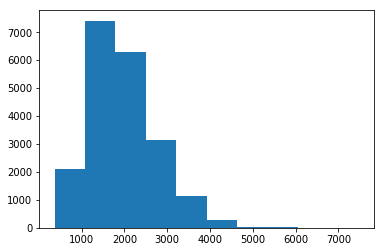

In [31]:
plt.hist(df["sqft_living"])

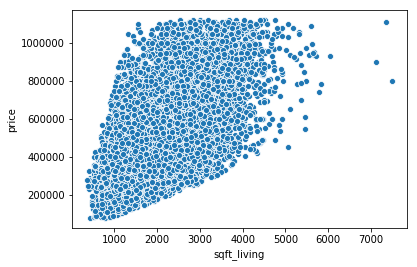

In [32]:
sns.scatterplot(x="sqft_living",y="price",data=df)

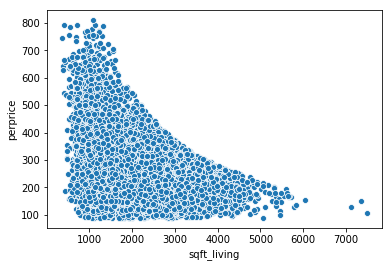

In [33]:
sns.scatterplot(x="sqft_living",y="perprice",data=df)

In [34]:
df.loc[df["sqft_basement"]>0,"sqft_basement"]=1

In [35]:
df["sqft_basement"].unique()

array([0, 1])

In [36]:
basement = (sum(df["sqft_basement"]==0),sum(df["sqft_basement"]==1))
basement

(12682, 7752)

([<matplotlib.patches.Wedge at 0x1a21816cf8>,
 [Text(0.4069678067969279, -1.0219477502450398, 'basement_no'),
  Text(-0.4069678067969278, 1.02194775024504, 'basement_yes')],
 [Text(0.22198244007105158, -0.5574260455882035, '62.06%'),
  Text(-0.2219824400710515, 0.5574260455882036, '37.94%')])

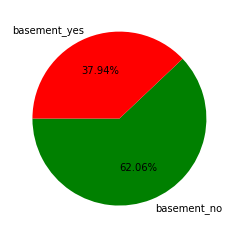

In [37]:
labels = ["basement_no","basement_yes"]
color = ["green","red"]
plt.pie(basement,labels=labels,colors=color,autopct='%.2f%%',startangle=180)

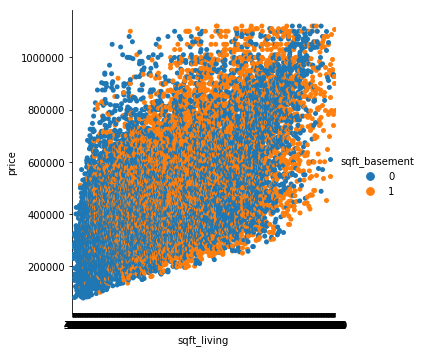

In [38]:
sns.catplot(x="sqft_living",y="price",hue="sqft_basement",data=df)

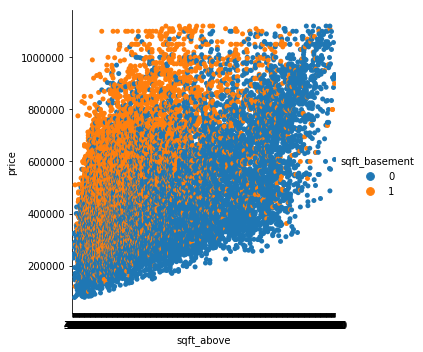

In [39]:
sns.catplot(x="sqft_above",y="price",hue="sqft_basement",data=df)

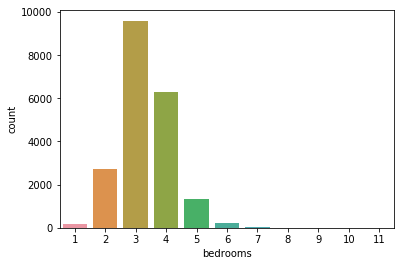

In [40]:
sns.countplot(df["bedrooms"])

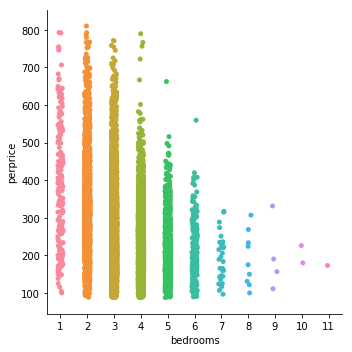

In [41]:
sns.catplot(x="bedrooms", y="perprice",data=df)

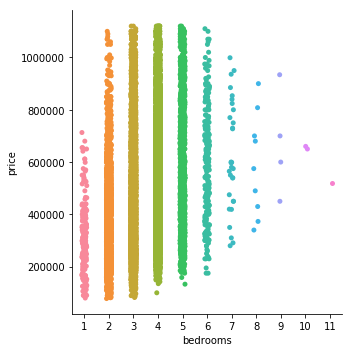

In [42]:
sns.catplot(x="bedrooms", y="price", data=df)

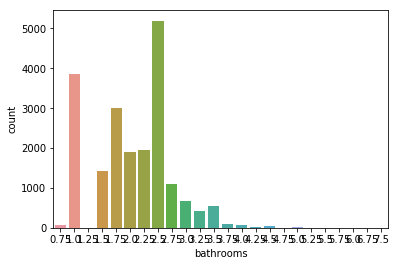

In [43]:
sns.countplot(df["bathrooms"])

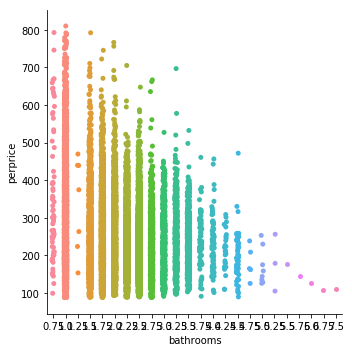

In [44]:
sns.catplot(x="bathrooms", y="perprice", data=df)

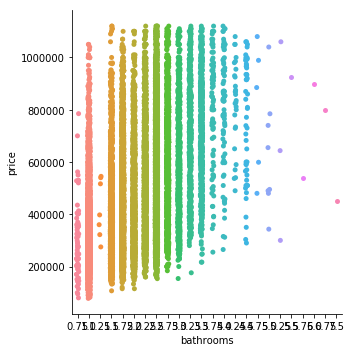

In [45]:
sns.catplot(x="bathrooms", y="price", data=df)

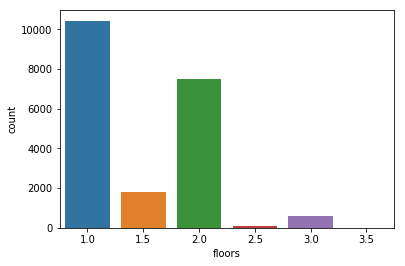

In [46]:
sns.countplot(df["floors"])

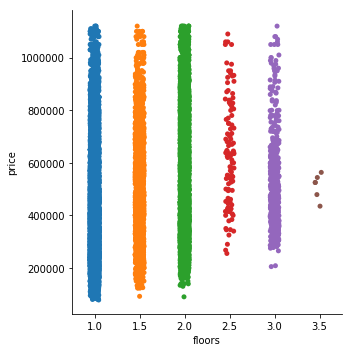

In [47]:
sns.catplot(x="floors", y="price", data=df)

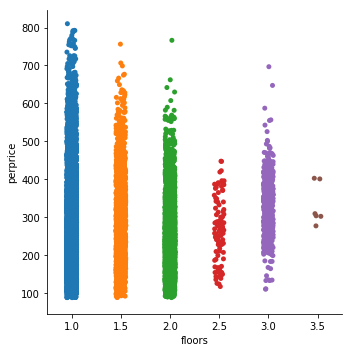

In [48]:
sns.catplot(x="floors", y="perprice", data=df)

In [49]:
condition = (sum(df["condition"]==1),sum(df["condition"]==2),sum(df["condition"]==3),sum(df["condition"]==4),sum(df["condition"]==5))
condition

(28, 168, 13265, 5414, 1559)

([<matplotlib.patches.Wedge at 0x1a25c03780>,
 [Text(-1.0999898077266654, -0.004735282193682976, 'G1'),
  Text(-1.0993477579392503, -0.037874887642652275, 'G2'),
  Text(0.5550208664610212, -0.9497114497534804, 'G3'),
  Text(-0.28178690211108265, 1.063294945816371, 'G4'),
  Text(-1.0685538814171796, 0.2611371335300292, 'G5')])

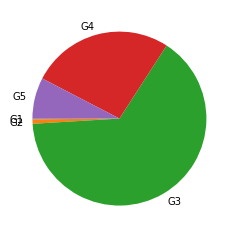

In [50]:
labels = ["G1","G2","G3","G4","G5"]
plt.pie(condition,labels=labels,startangle=180)

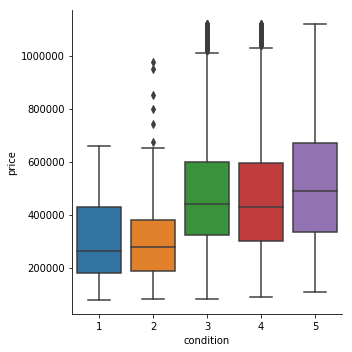

In [51]:
sns.catplot(x="condition", y="price",kind="box",data=df)

(array([1.000e+00, 2.700e+01, 2.410e+02, 2.035e+03, 8.961e+03, 5.942e+03,
        2.319e+03, 7.660e+02, 1.370e+02, 5.000e+00]),
 array([ 3. ,  3.9,  4.8,  5.7,  6.6,  7.5,  8.4,  9.3, 10.2, 11.1, 12. ]),
 <a list of 10 Patch objects>)

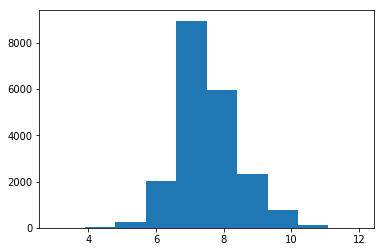

In [52]:
df["grade"].unique()
plt.hist(df["grade"])

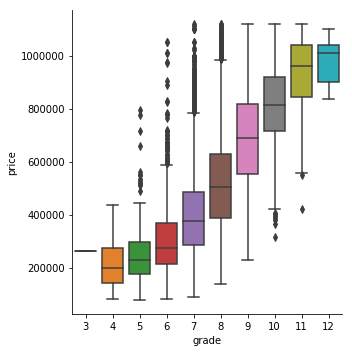

In [53]:
sns.catplot(x="grade", y="price",kind="box",data=df)

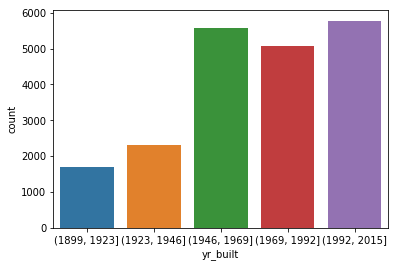

In [54]:
sns.countplot(df["yr_built"])

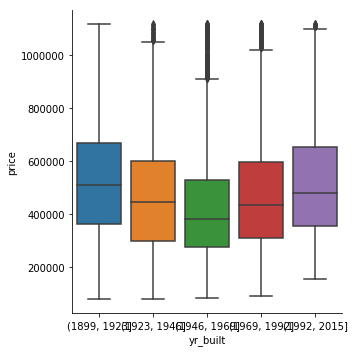

In [55]:
sns.catplot(x="yr_built", y="price",kind="box",data=df)

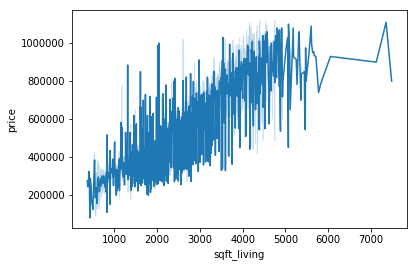

In [56]:
sns.lineplot(x="sqft_living", y="price", data=df)

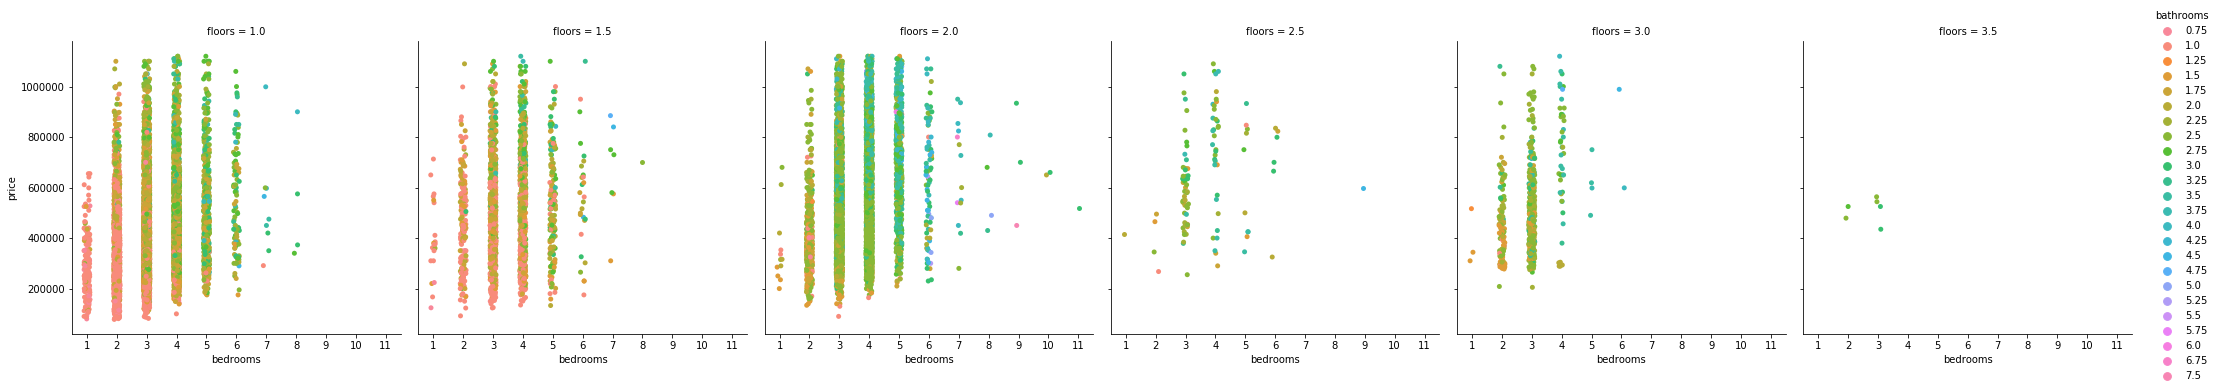

In [57]:
sns.catplot(x="bedrooms", y="price", hue="bathrooms",
                 col="floors", data=df);

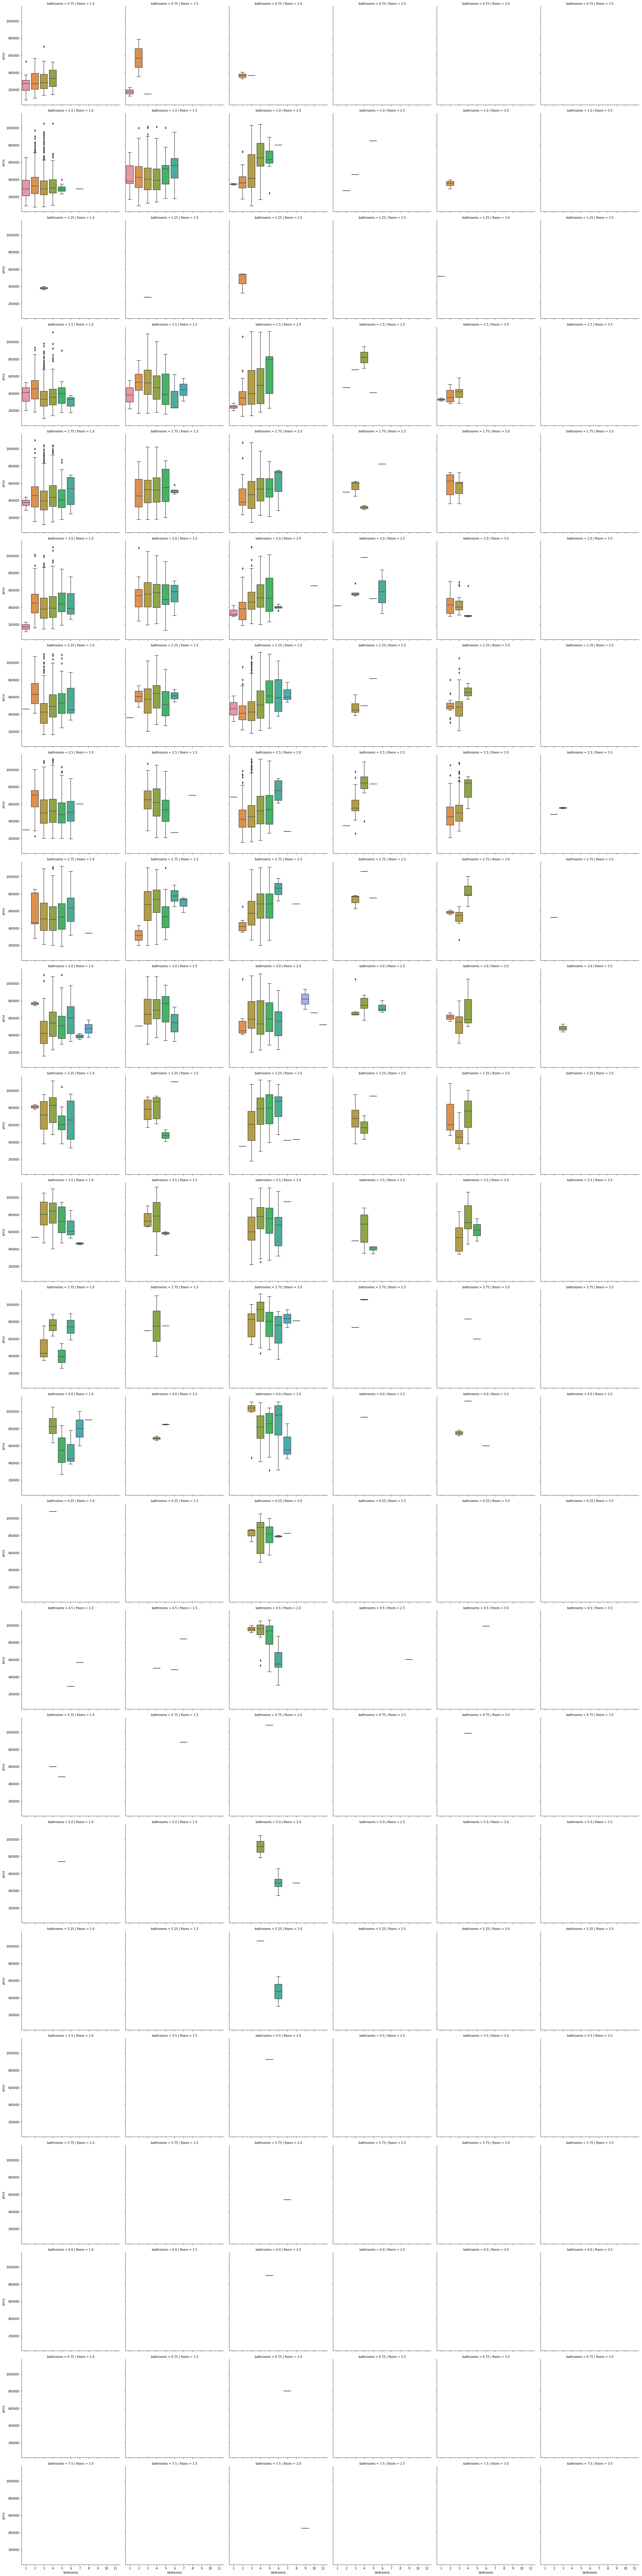

In [58]:
sns.catplot(x="bedrooms", y="price", row="bathrooms", 
            kind="box",
                 col="floors", data=df);

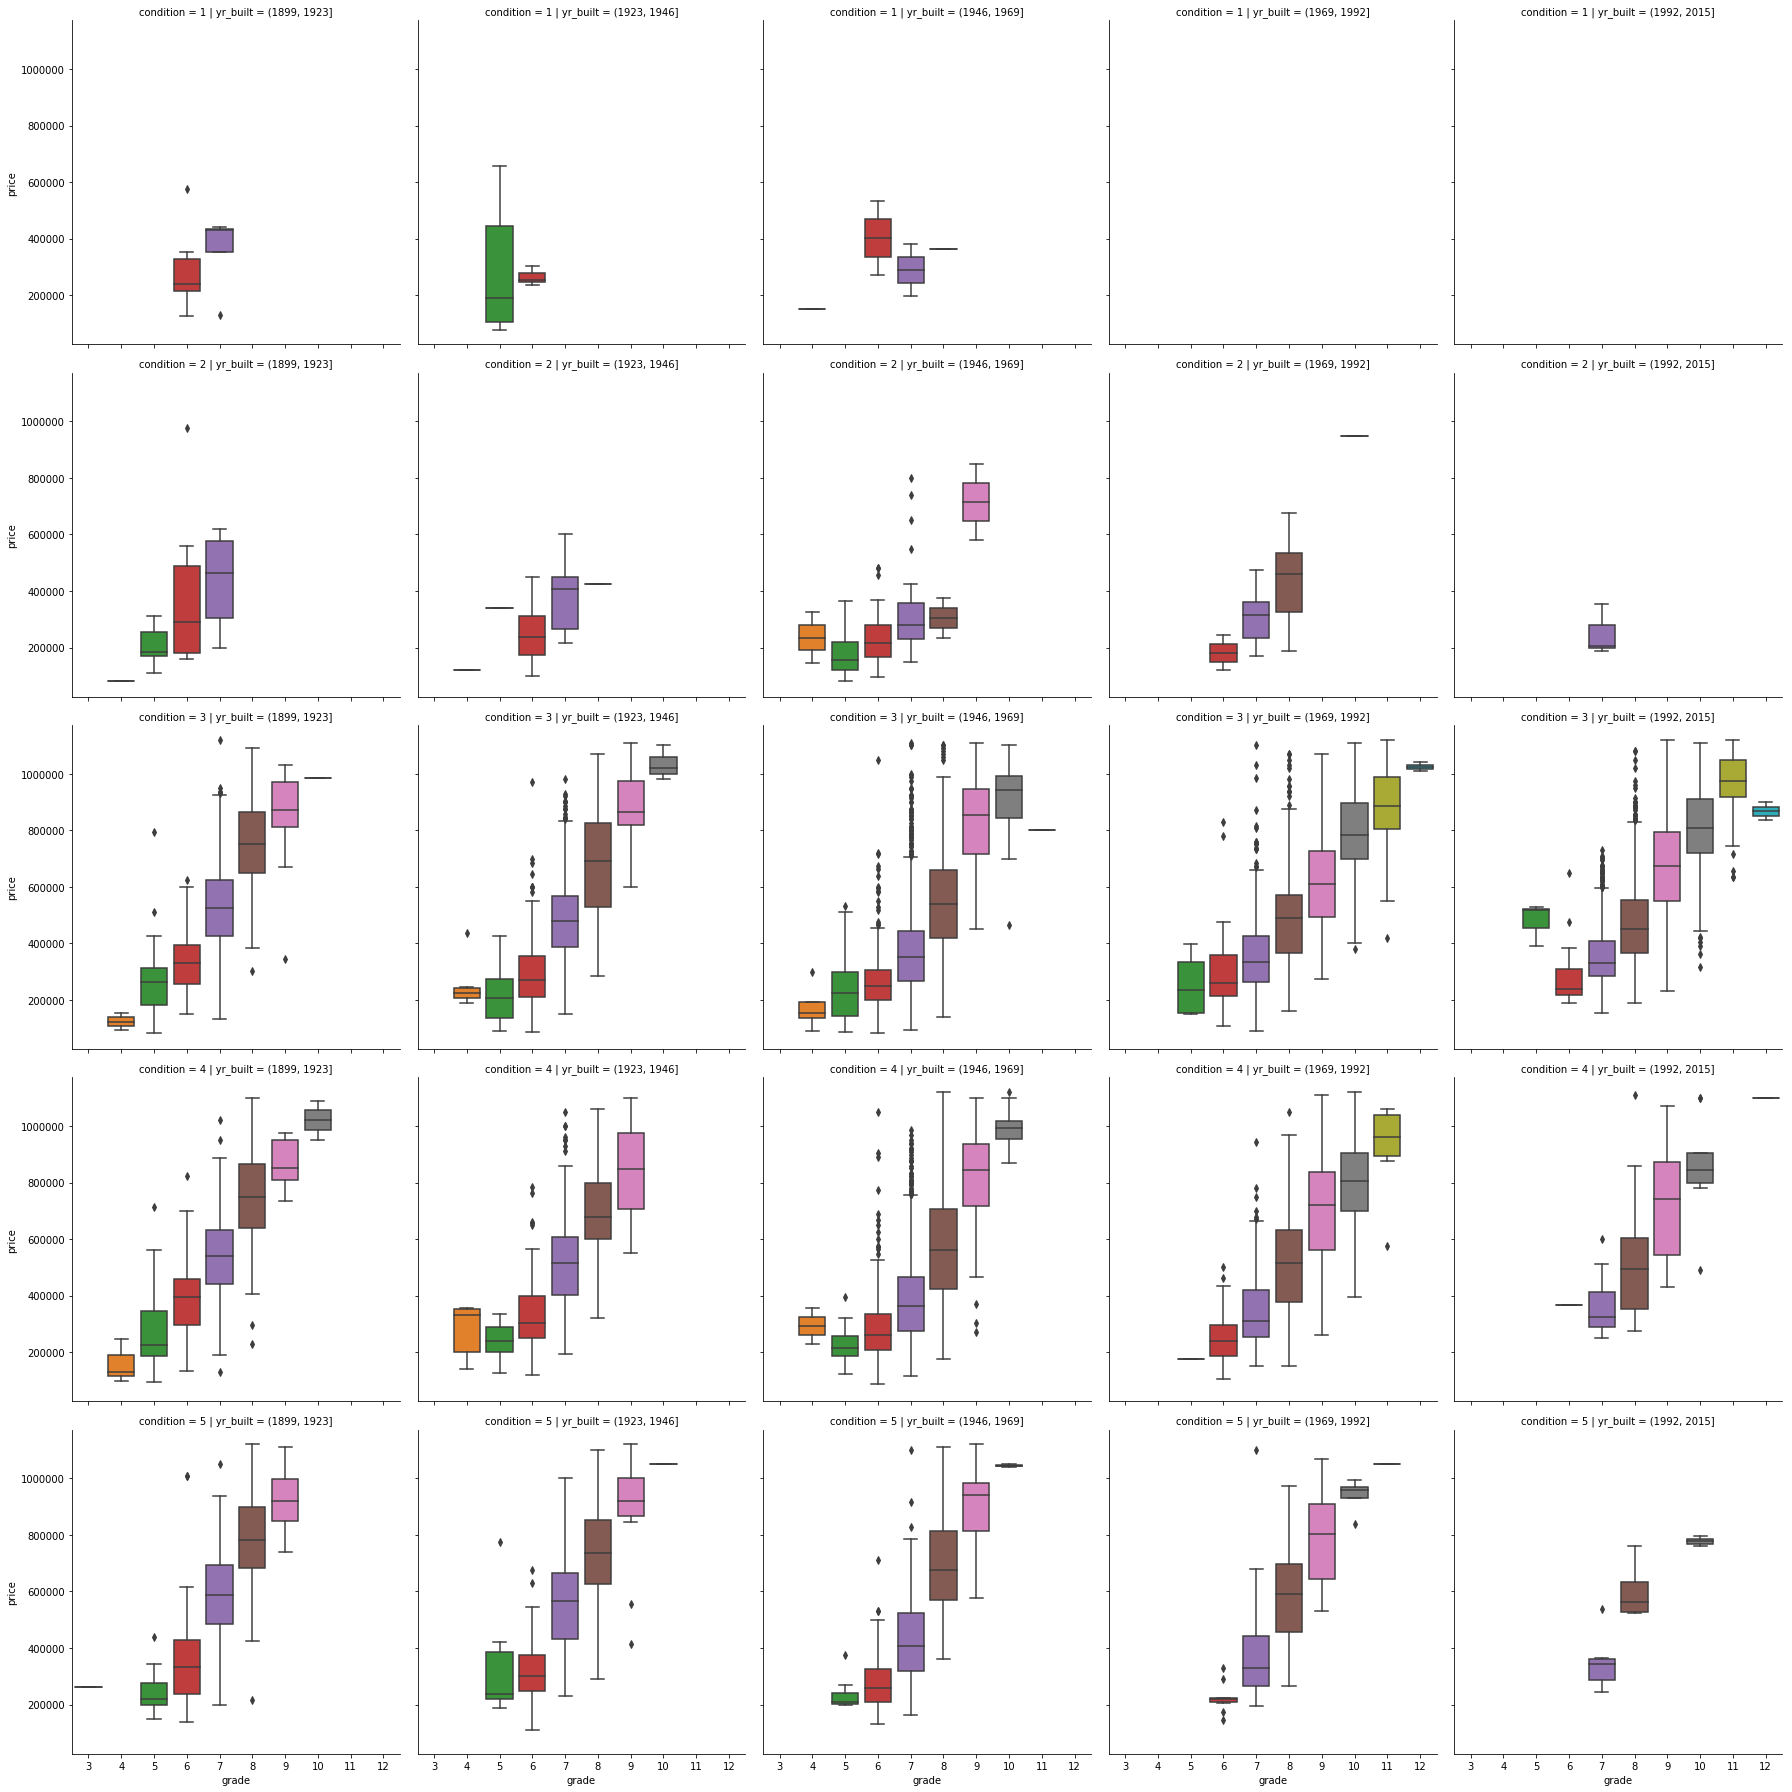

In [59]:
sns.catplot(x="grade", y="price", row="condition", 
            kind="box",
                 col="yr_built", data=df);

In [60]:
data.shape

(20434, 10)

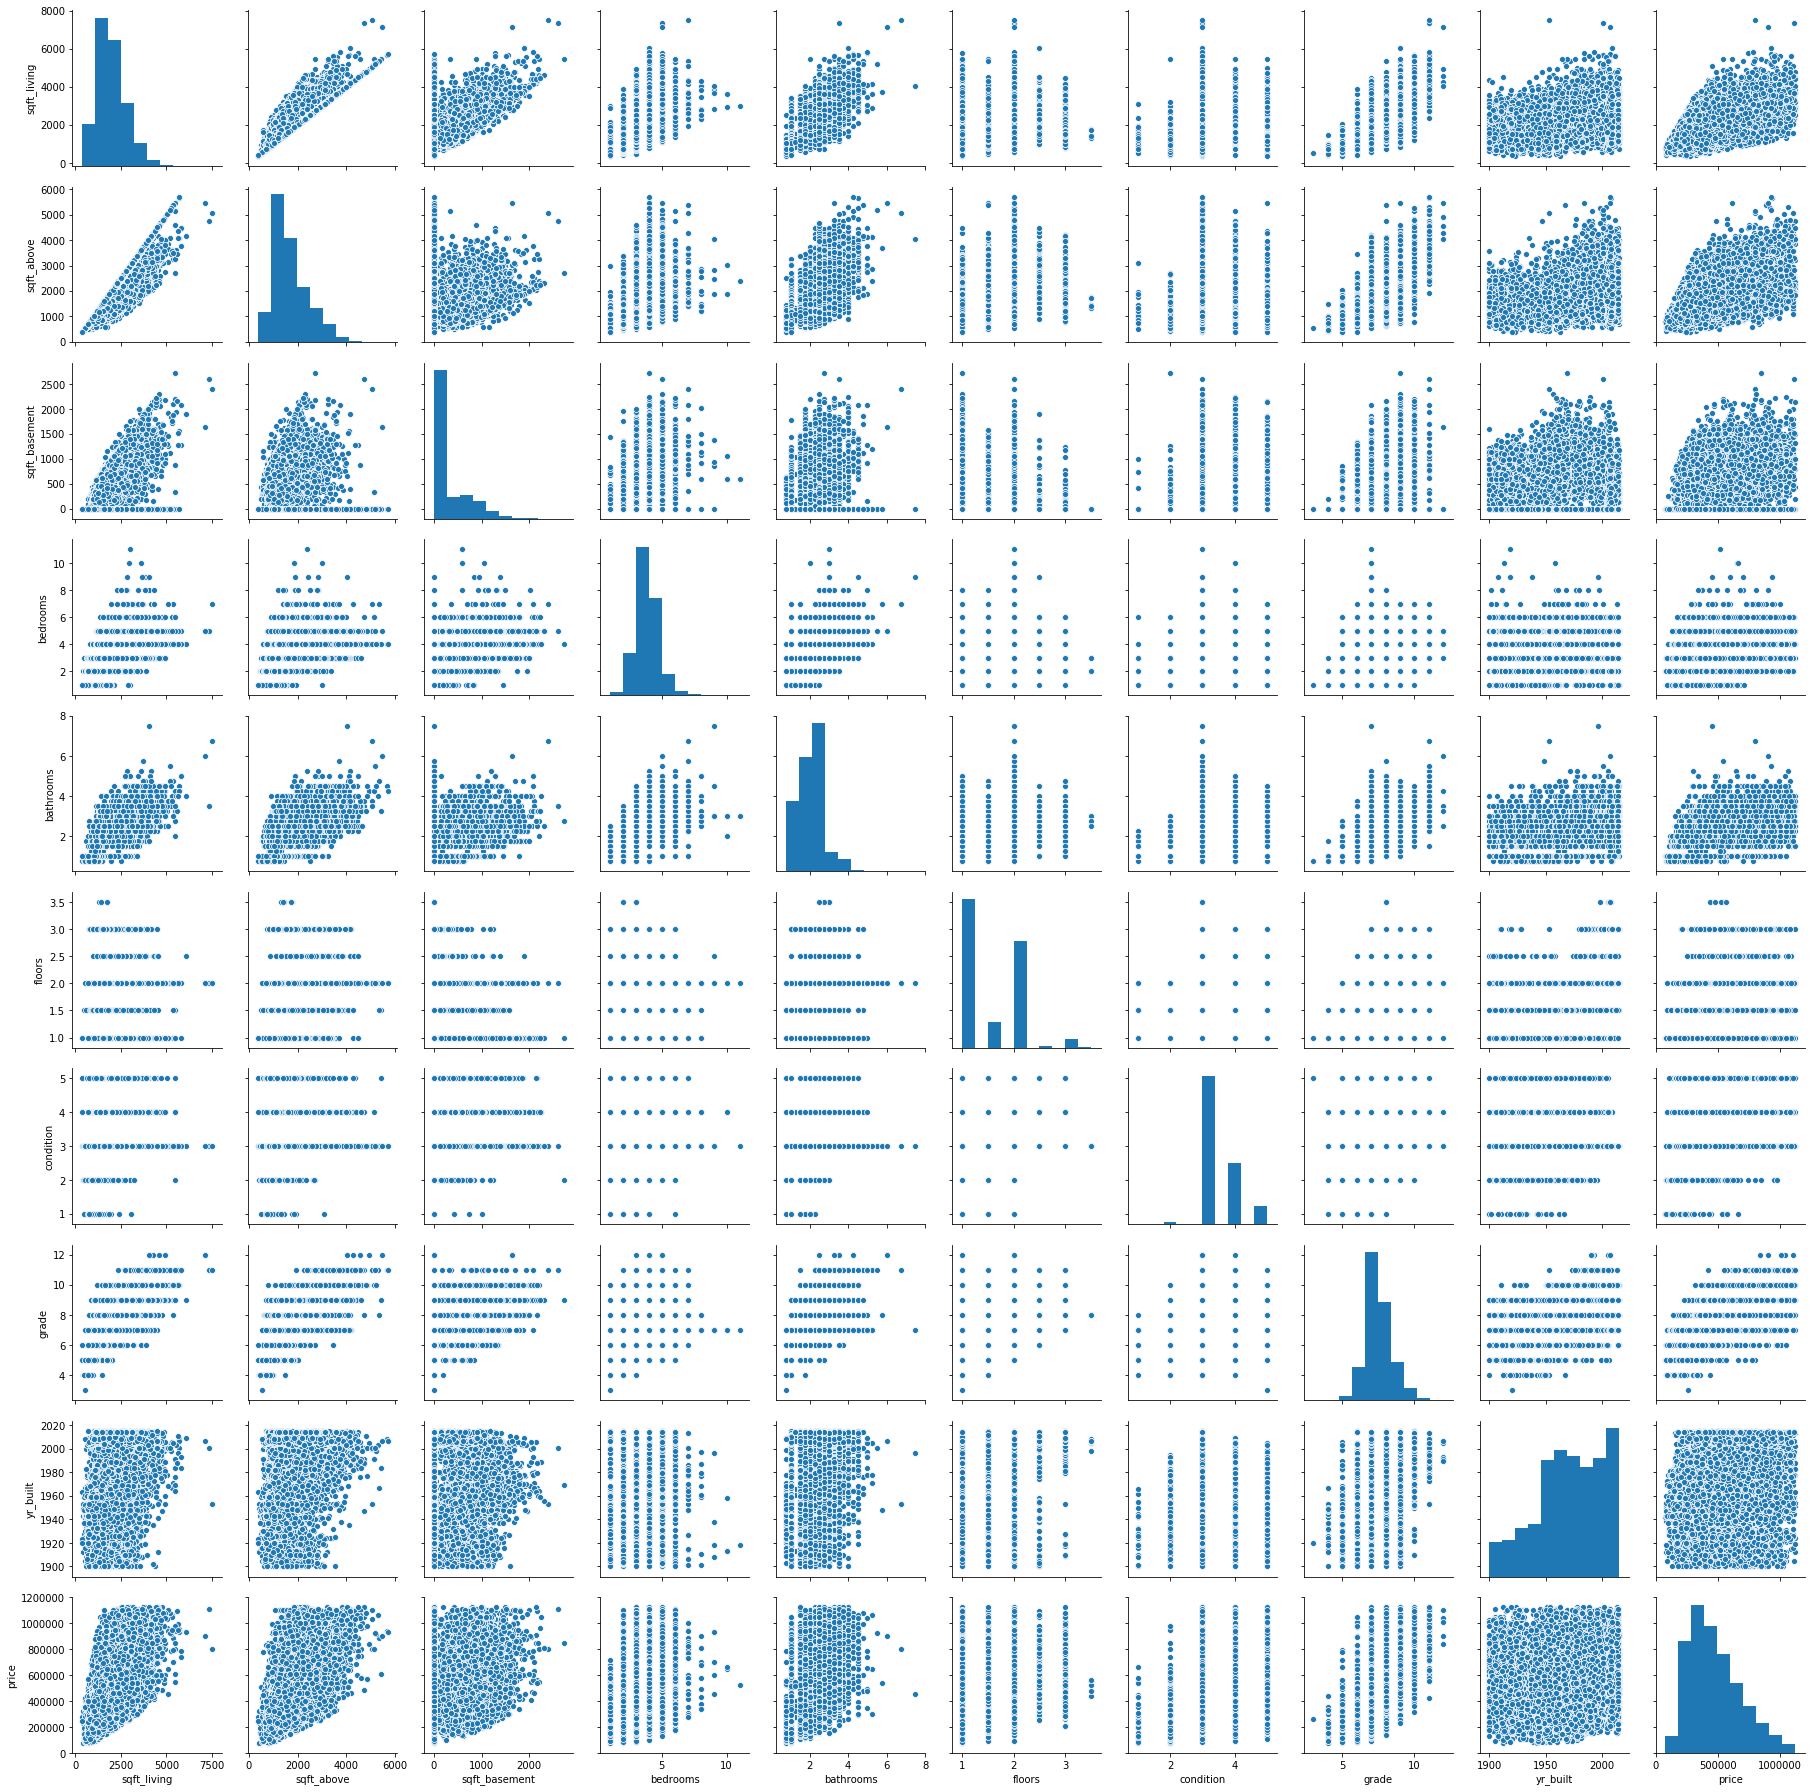

In [61]:
cols = ['sqft_living',"sqft_above","sqft_basement" ,'bedrooms', 'bathrooms', 'floors', "condition","grade","yr_built",'price']
sns.pairplot(data[cols]);

In [62]:
cm = np.corrcoef(data[cols].values.T)
cm

array([[ 1.        ,  0.85336614,  0.37547961,  0.60131967,  0.71673694,
         0.34038336, -0.07321236,  0.705112  ,  0.35381721,  0.62131697],
       [ 0.85336614,  1.        , -0.16274639,  0.47787709,  0.63846844,
         0.52863141, -0.17876217,  0.71001562,  0.46204303,  0.52990436],
       [ 0.37547961, -0.16274639,  1.        ,  0.28848692,  0.22142061,
        -0.29561269,  0.17925151,  0.07221617, -0.15180073,  0.23383678],
       [ 0.60131967,  0.47787709,  0.28848692,  1.        ,  0.50455547,
         0.16059383,  0.02129829,  0.32873265,  0.16640611,  0.30067339],
       [ 0.71673694,  0.63846844,  0.22142061,  0.50455547,  1.        ,
         0.5027968 , -0.13734458,  0.61387428,  0.54484924,  0.45476944],
       [ 0.34038336,  0.52863141, -0.29561269,  0.16059383,  0.5027968 ,
         1.        , -0.27826911,  0.45747136,  0.51170722,  0.27333733],
       [-0.07321236, -0.17876217,  0.17925151,  0.02129829, -0.13734458,
        -0.27826911,  1.        , -0.17058383

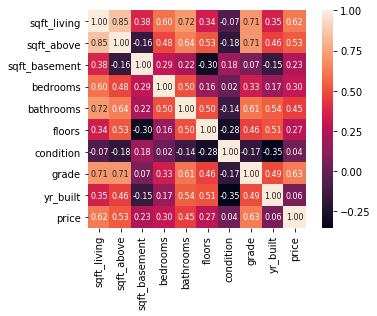

In [63]:
sns.heatmap(cm,cbar=True, annot=True,square=True,
                 fmt='.2f',annot_kws={'size': 8},
                 yticklabels=cols,xticklabels=cols);

In [64]:
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,1.0,3,7,1180,0,1955
1,538000.0,3,2.25,2570,2.0,3,7,2170,400,1951
2,180000.0,2,1.00,770,1.0,3,6,770,0,1933
3,604000.0,4,3.00,1960,1.0,5,7,1050,910,1965
4,510000.0,3,2.00,1680,1.0,3,8,1680,0,1987


In [65]:

features_data = data.iloc[:,1::]
features_data.head()

,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built
0,3,1.00,1180,1.0,3,7,1180,0,1955
1,3,2.25,2570,2.0,3,7,2170,400,1951
2,2,1.00,770,1.0,3,6,770,0,1933
3,4,3.00,1960,1.0,5,7,1050,910,1965
4,3,2.00,1680,1.0,3,8,1680,0,1987


In [66]:
target_data = data.iloc[:,0]
target_data

0         221900.0
1         538000.0
2         180000.0
3         604000.0
4         510000.0
6         257500.0
7         291850.0
8         229500.0
9         323000.0
10        662500.0
11        468000.0
12        310000.0
13        400000.0
14        530000.0
15        650000.0
16        395000.0
17        485000.0
18        189000.0
19        230000.0
20        385000.0
22        285000.0
23        252700.0
24        329000.0
25        233000.0
26        937000.0
27        667000.0
28        438000.0
29        719000.0
30        580500.0
31        280000.0
           ...    
21580     594866.0
21581     625000.0
21582     490000.0
21583     399950.0
21584     380000.0
21585     270000.0
21586     505000.0
21587     385000.0
21588     414500.0
21589     347500.0
21591     572000.0
21592     475000.0
21593    1090000.0
21594     350000.0
21595     520000.0
21596     679950.0
21598     541800.0
21599     810000.0
21601     467000.0
21602     224000.0
21603     507250.0
21604     42

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    features_data, target_data, test_size=0.30, random_state=0)

In [68]:
#sacling
std = StandardScaler()
std_training = std.fit_transform(X_train)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [69]:
std_test = std.fit_transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [70]:
# pca
pca = PCA(n_components=3)

X_r = pca.fit(std_training).transform(std_training)

X_r.shape

(14303, 3)

In [71]:
pca.inverse_transform(X_r)[0:5]

array([[-0.7676397 , -0.77438172, -0.95678828, -0.39423975, -0.33921458,
        -0.74087979, -0.86901705, -0.27029989, -0.27144273],
       [-0.74249833, -0.34725652, -0.70171032,  0.19045106, -1.078798  ,
        -0.30028196, -0.44607258, -0.53638468,  0.42463045],
       [ 0.81784819,  0.29774282,  0.66059687, -0.99147446,  0.44090005,
        -0.0420232 , -0.31332087,  1.80131044, -0.56836208],
       [ 0.34269967,  0.77776627,  0.68610488,  0.97717143, -0.40064209,
         0.8587716 ,  1.01547332, -0.49974628,  0.84768906],
       [-0.25375707, -0.14216233, -0.24560306,  0.10569061, -0.22339365,
        -0.09505295, -0.09472577, -0.29629363,  0.09999226]])

In [72]:
print(pca.explained_variance_ratio_)

[0.46631434 0.19534073 0.09486321]


In [73]:
# select K best
# Select the top three features to use for Linear Regression
selector = SelectKBest(f_regression, k=3)
selector.fit(features_data, target_data)

SelectKBest(k=3, score_func=<function f_regression at 0x1a1fc13378>)

In [74]:
selector.get_support()

array([False, False,  True, False, False,  True,  True, False, False])

In [75]:
print(features_data.columns.values[selector.get_support()])

['sqft_living' 'grade' 'sqft_above']


In [76]:
selector.scores_

array([ 2030.73177341,  5327.44614811, 12846.7580346 ,  1649.80444383,
          28.09274048, 13511.90507364,  7977.28952199,  1181.83685088,
          76.58877959])

In [77]:
# linear regression for the price predicting
X = std_training[:, selector.get_support()]
print(X.shape)

(14303, 3)


In [78]:
test=std_test[:, selector.get_support()]

In [79]:
lr = LinearRegression(normalize=True);

In [80]:
lr.fit(X, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [81]:
y_pred = lr.predict(test)

In [82]:
lr.coef_

array([100057.1647953 ,  86357.8063389 , -36405.87155245])

In [83]:
lr.intercept_

478051.99188981333

In [84]:
print("Mean squared error: {:.2f}".format(
        mean_squared_error(y_test, y_pred)))

Mean squared error: 23051213863.04


In [85]:
np.mean((y_test - y_pred)**2)

23051213863.044476

In [86]:
test

array([[ 0.99687041,  1.39625668,  1.41059468],
       [-0.63115431,  0.43451646, -0.30991312],
       [-1.68231988, -1.48896398, -1.42079218],
       ...,
       [ 0.06107667, -0.52722376, -0.83825804],
       [-0.47732521, -0.52722376, -0.14734545],
       [ 0.24054396,  0.43451646, -0.24217659]])

In [87]:
print("Variance score: {:.2f}".format(
    r2_score(y_test, y_pred)))

Variance score: 0.46


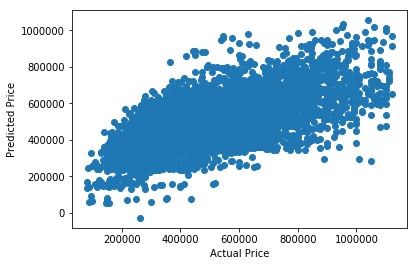

In [88]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price');

In [89]:
# logistical regression for the housetype

In [90]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,1.0,3,7,1180,0,1955
1,538000.0,3,2.25,2570,2.0,3,7,2170,400,1951
2,180000.0,2,1.00,770,1.0,3,6,770,0,1933
3,604000.0,4,3.00,1960,1.0,5,7,1050,910,1965
4,510000.0,3,2.00,1680,1.0,3,8,1680,0,1987


In [91]:
display(df1.price.min(),df1.price.max())

78000.0

1120000.0

In [92]:
df1['housetype'] = (df1['price'] >=500000).astype(int)

In [93]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,housetype
0,221900.0,3,1.00,1180,1.0,3,7,1180,0,1955,0
1,538000.0,3,2.25,2570,2.0,3,7,2170,400,1951,1
2,180000.0,2,1.00,770,1.0,3,6,770,0,1933,0
3,604000.0,4,3.00,1960,1.0,5,7,1050,910,1965,1
4,510000.0,3,2.00,1680,1.0,3,8,1680,0,1987,1


In [94]:
#df1["housetype"][df1["housetype"]==0]="ordinary"

In [95]:
#df1["housetype"][df1["housetype"]==1]="luxucy"

In [96]:
X2= df1.drop(columns=["price","housetype"])
X2.head()

,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built
0,3,1.00,1180,1.0,3,7,1180,0,1955
1,3,2.25,2570,2.0,3,7,2170,400,1951
2,2,1.00,770,1.0,3,6,770,0,1933
3,4,3.00,1960,1.0,5,7,1050,910,1965
4,3,2.00,1680,1.0,3,8,1680,0,1987


In [97]:
X2=X2.values
Y1 = df1.housetype
Y1.head()

0    0
1    1
2    0
3    1
4    1
Name: housetype, dtype: int64

In [98]:
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')

In [99]:
logreg.fit(X2, Y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [100]:
probs = logreg.predict_proba(X2)
probs[:9]

array([[0.89912142, 0.10087858],
       [0.6271926 , 0.3728074 ],
       [0.97347618, 0.02652382],
       [0.58399721, 0.41600279],
       [0.70572237, 0.29427763],
       [0.86619056, 0.13380944],
       [0.92075009, 0.07924991],
       [0.7695976 , 0.2304024 ],
       [0.86003787, 0.13996213]])

In [101]:
pred = logreg.predict(X2)
pred[:5]

array([0, 0, 0, 0, 0])

In [102]:
metrics.confusion_matrix(Y1, pred)

array([[10869,  1521],
       [ 2952,  5092]])

In [103]:
metrics.confusion_matrix(Y1, pred)

0.7811001272389155

In [104]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,housetype
0,221900.0,3,1.00,1180,1.0,3,7,1180,0,1955,0
1,538000.0,3,2.25,2570,2.0,3,7,2170,400,1951,1
2,180000.0,2,1.00,770,1.0,3,6,770,0,1933,0
3,604000.0,4,3.00,1960,1.0,5,7,1050,910,1965,1
4,510000.0,3,2.00,1680,1.0,3,8,1680,0,1987,1


In [105]:
X4 = df1.drop(columns=["price","housetype"])
X4.head()

,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built
0,3,1.00,1180,1.0,3,7,1180,0,1955
1,3,2.25,2570,2.0,3,7,2170,400,1951
2,2,1.00,770,1.0,3,6,770,0,1933
3,4,3.00,1960,1.0,5,7,1050,910,1965
4,3,2.00,1680,1.0,3,8,1680,0,1987


In [106]:
X5 = copy.deepcopy(X4)

In [107]:
X5.head()

,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built
0,3,1.00,1180,1.0,3,7,1180,0,1955
1,3,2.25,2570,2.0,3,7,2170,400,1951
2,2,1.00,770,1.0,3,6,770,0,1933
3,4,3.00,1960,1.0,5,7,1050,910,1965
4,3,2.00,1680,1.0,3,8,1680,0,1987


In [108]:
X4names = X4.columns.values
X4names

array(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built'], dtype=object)

In [109]:
X4=X4.values

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X4, df1.housetype, test_size=0.2)

In [111]:
pca = PCA(n_components=2)

X_r = pca.fit(X_train).transform(X_train)

X_r.shape

(16347, 2)

In [112]:
pca.inverse_transform(X_r)[0:5]

array([[3.08420374e+00, 1.86874861e+00, 1.66994871e+03, 1.53442892e+00,
        3.34905850e+00, 7.35914586e+00, 1.66982455e+03, 1.24162549e-01,
        1.97151214e+03],
       [3.00062229e+00, 1.66422663e+00, 1.43016247e+03, 1.15789448e+00,
        3.55438187e+00, 6.85203631e+00, 9.80554348e+02, 4.49608120e+02,
        1.95644347e+03],
       [3.04177876e+00, 1.68274674e+00, 1.47012290e+03, 1.11449289e+00,
        3.58378789e+00, 6.84316757e+00, 9.30419709e+02, 5.39703194e+02,
        1.95501377e+03],
       [2.96599963e+00, 1.67353042e+00, 1.42019571e+03, 1.26368146e+00,
        3.49013075e+00, 6.93778409e+00, 1.14066785e+03, 2.79527861e+02,
        1.96032555e+03],
       [2.93946844e+00, 1.72000154e+00, 1.44994892e+03, 1.45427167e+00,
        3.37842385e+00, 7.12726552e+00, 1.44982442e+03, 1.24497373e-01,
        1.96753649e+03]])

In [113]:
print(pca.explained_variance_ratio_)

[0.80922335 0.19026465]


In [114]:
# select K best
# Select the top two features
selector = SelectKBest(f_regression, k=2)
selector.fit(X5,df1.housetype)

SelectKBest(k=2, score_func=<function f_regression at 0x1a1fc13378>)

In [115]:
selector.get_support()

array([False, False,  True, False, False,  True, False, False, False])

In [116]:
print(features_data.columns.values[selector.get_support()])

['sqft_living' 'grade']


In [117]:
q = X_train[:, selector.get_support()]
print(q.shape)

(16347, 2)


In [118]:
q1=X_test[:, selector.get_support()]
print(q.shape)

(16347, 2)


In [119]:
pipe_by = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', GaussianNB())])

pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', SVC(gamma='auto'))])

pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', DecisionTreeClassifier())])

In [120]:
pipelines = [pipe_by, pipe_svm, pipe_dt]

pipe_dict = {0: 'Gaussian Naive Bayes', 1: 'Support Vector Machine', 2: 'Decision Tree'}

for pipe in pipelines:
    pipe.fit(q, y_train)

In [121]:
for idx, val in enumerate(pipelines):
    print('{} pipeline test accuracy: {:.3f}'.format(
        pipe_dict[idx], val.score(q1, y_test)))
best_acc = 0.0
best_clf = 0
best_pipe = ''

for idx, val in enumerate(pipelines):
    if val.score(q1, y_test) > best_acc:
        best_acc = val.score(q1, y_test)
        best_pipe = val
        best_clf = idx

print('Classifier with best accuracy: {}'.format(pipe_dict[best_clf]))

Gaussian Naive Bayes pipeline test accuracy: 0.750
Support Vector Machine pipeline test accuracy: 0.761
Decision Tree pipeline test accuracy: 0.744
Classifier with best accuracy: Support Vector Machine


In [122]:
#from sklearn.svm import SVC

In [123]:
#model = SVC(kernel='linear')

#model.fit(q, y_train)

In [124]:
# Naive Bayes

In [152]:
X = df1[["sqft_living","grade"]]
X.head()

,sqft_living,grade
0,1180,7
1,2570,7
2,770,6
3,1960,7
4,1680,8


In [153]:
y = df1["housetype"]
y

0        0
1        1
2        0
3        1
4        1
6        0
7        0
8        0
9        0
10       1
11       0
12       0
13       0
14       1
15       1
16       0
17       0
18       0
19       0
20       0
22       0
23       0
24       0
25       0
26       1
27       1
28       0
29       1
30       1
31       0
        ..
21580    1
21581    1
21582    0
21583    0
21584    0
21585    0
21586    1
21587    0
21588    0
21589    0
21591    1
21592    0
21593    1
21594    0
21595    1
21596    1
21598    1
21599    1
21601    0
21602    0
21603    1
21604    0
21605    1
21606    1
21607    0
21608    0
21609    0
21610    0
21611    0
21612    0
Name: housetype, Length: 20434, dtype: int64

In [154]:
model = GaussianNB()

In [155]:
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

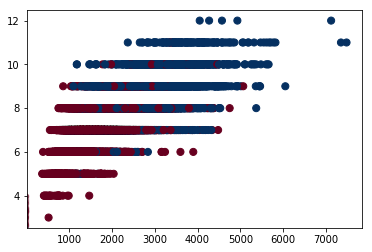

In [156]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(1000, 2)
ynew = model.predict(Xnew)
plt.scatter(X["sqft_living"], X["grade"], c=y, s=50, cmap='RdBu')
lim = plt.axis()

plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [157]:
# decision tree

In [158]:
plot_step =1

In [159]:
clf = DecisionTreeClassifier().fit(X, y)

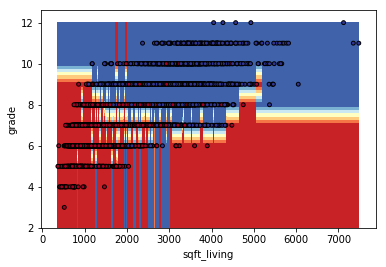

In [160]:
x_min, x_max = X["sqft_living"].min() - 1, X["sqft_living"].max() + 1
y_min, y_max = X["grade"].min() - 1, X["grade"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
plt.xlabel("sqft_living")
plt.ylabel("grade")
plt.scatter(X["sqft_living"], X["grade"], c=y,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

In [161]:
# svm
X = df1.loc[:,["sqft_living","price"]]

In [162]:
X=X.values

In [163]:
model = SVC(kernel='linear')

model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


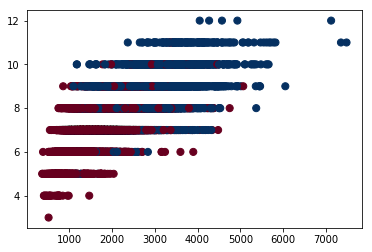

In [164]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], 
               alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolors='g');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
plt.scatter(df1["sqft_living"], df1["grade"], c=y, s=50, cmap='RdBu')

plot_svc_decision_function(model);

In [165]:
# k-mean cluster


In [166]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,yr_built,housetype
0,221900.0,3,1.00,1180,1.0,3,7,1180,0,1955,0
1,538000.0,3,2.25,2570,2.0,3,7,2170,400,1951,1
2,180000.0,2,1.00,770,1.0,3,6,770,0,1933,0
3,604000.0,4,3.00,1960,1.0,5,7,1050,910,1965,1
4,510000.0,3,2.00,1680,1.0,3,8,1680,0,1987,1


In [167]:
X = df1.loc[:,["sqft_living","price"]]
X.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


In [168]:
X=X.values
X

array([[  1180., 221900.],
       [  2570., 538000.],
       [   770., 180000.],
       ...,
       [  1020., 402101.],
       [  1600., 400000.],
       [  1020., 325000.]])

In [169]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(X)

y_kmeans = kmeans.predict(X)

In [170]:
kmeans.labels_

array([1, 3, 1, ..., 3, 3, 1], dtype=int32)

In [171]:
centers = kmeans.cluster_centers_
print(centers)

[[  2318.32720753 636893.89623486]
 [  1536.25575589 274325.88141472]
 [  2966.14516834 888453.30126802]
 [  1877.99119691 446352.54486487]]


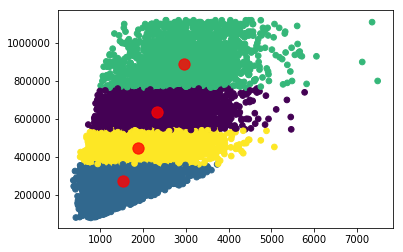

In [172]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=32, cmap="viridis")
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=128, alpha=0.8);